## Análisis y modelado predictivo para tienda minorista

En este notebook realizaremos un análisis exploratorio de los datos de la tienda. El objetivo es comprender la estructura de los datos, identificar patrones iniciales y preparar el terreno para análisis más profundos y modelado.

### 1. Importacion de librerias y carga de datos

In [2]:
# importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargamos los 4 archivos de datos en dataframes de pandas.
try:
    df_clientes = pd.read_excel('data/clientes.xlsx')
    df_productos = pd.read_excel('data/productos.xlsx')
    df_ventas = pd.read_excel('data/ventas.xlsx')
    df_detalle = pd.read_excel('data/detalle_ventas.xlsx')
    print("Archivos cargados correctamente.")
except FileNotFoundError as e:
    print(f"Error al cargar los archivos: {e}")
    print("Asegúrate de que los archivos .xlsx se encuentren en la carpeta 'data'.")

Archivos cargados correctamente.


In [4]:
# Convertimos a .csv los dataframes cargados
df_clientes.to_csv('data/clientes.csv', index=False)
df_productos.to_csv('data/productos.csv', index=False)
df_ventas.to_csv('data/ventas.csv', index=False)
df_detalle.to_csv('data/detalle_ventas.csv', index=False)
print("Archivos convertidos a .csv correctamente.")

Archivos convertidos a .csv correctamente.


### 2. Análisis individual de cada dataframe y visualizaciones

#### 2.1. Análisis de clientes

In [5]:
# 2.1. Análisis de clientes (df_clientes)
print("--- Información de clientes ---")
df_clientes.info()

print("\n--- Primeras 5 filas de clientes ---")
display(df_clientes.head())

print("\n--- Resumen estadístico de clientes ---")
display(df_clientes.describe(include='all'))

print("\n--- Conteo de valores nulos en clientes ---")
print(df_clientes.isnull().sum())

--- Información de clientes ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_cliente      100 non-null    int64         
 1   nombre_cliente  100 non-null    object        
 2   email           100 non-null    object        
 3   ciudad          100 non-null    object        
 4   fecha_alta      100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.0+ KB

--- Primeras 5 filas de clientes ---


,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01
1,2,Nicolas Rojas,nicolas.rojas@mail.com,Carlos Paz,2023-01-02
2,3,Hernan Martinez,hernan.martinez@mail.com,Rio Cuarto,2023-01-03
3,4,Uma Martinez,uma.martinez@mail.com,Carlos Paz,2023-01-04
4,5,Agustina Flores,agustina.flores@mail.com,Cordoba,2023-01-05



--- Resumen estadístico de clientes ---


,id_cliente,nombre_cliente,email,ciudad,fecha_alta
count,100.000000,100,100,100,100
unique,NaN,95,100,6,NaN
top,NaN,Bruno Castro,mariana.lopez@mail.com,Rio Cuarto,NaN
freq,NaN,2,1,23,NaN
mean,50.500000,NaN,NaN,NaN,2023-02-19 12:00:00
min,1.000000,NaN,NaN,NaN,2023-01-01 00:00:00
25%,25.750000,NaN,NaN,NaN,2023-01-25 18:00:00
50%,50.500000,NaN,NaN,NaN,2023-02-19 12:00:00
75%,75.250000,NaN,NaN,NaN,2023-03-16 06:00:00
max,100.000000,NaN,NaN,NaN,2023-04-10 00:00:00



--- Conteo de valores nulos en clientes ---
id_cliente        0
nombre_cliente    0
email             0
ciudad            0
fecha_alta        0
dtype: int64


#### 2.1.1. Visualizacion de clientes

Pregunta 1: Cual es la distribucion de clientes por ciudad?

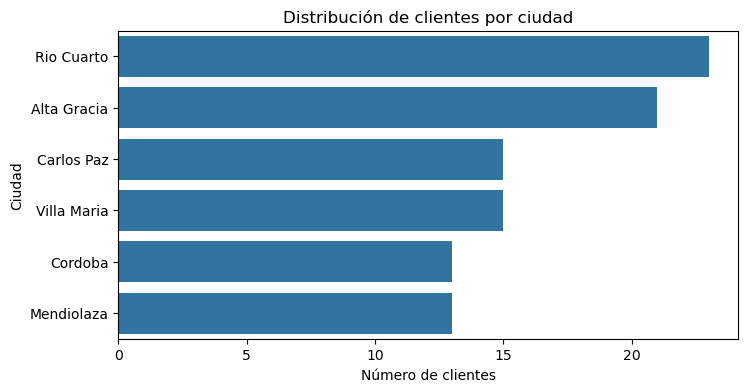

In [6]:
# Visualización: Distribución de clientes por ciudad
plt.figure(figsize=(8, 4))
sns.countplot(y='ciudad', data=df_clientes, order=df_clientes['ciudad'].value_counts().index)
plt.title('Distribución de clientes por ciudad')
plt.xlabel('Número de clientes')
plt.ylabel('Ciudad')
plt.show()

#### Observaciones de clientes

Podemos ver que la mayor cantidad de clientes se ubican en Rio Cuarto, seguido de Alta Gracia.

#### 2.2. Análisis de productos

In [7]:
# 2.2. Análisis de productos (df_productos)
print("--- Información de productos ---")
df_productos.info()

print("\n--- Primeras 5 filas de productos ---")
display(df_productos.head())

print("\n--- Resumen estadístico de productos ---")
display(df_productos.describe(include='all'))

print("\n--- Conteo de valores nulos en productos ---")
print(df_productos.isnull().sum())

--- Información de productos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_producto      100 non-null    int64 
 1   nombre_producto  100 non-null    object
 2   categoria        100 non-null    object
 3   precio_unitario  100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ KB

--- Primeras 5 filas de productos ---


,id_producto,nombre_producto,categoria,precio_unitario
0,1,Coca Cola 1.5L,Alimentos,2347
1,2,Pepsi 1.5L,Limpieza,4973
2,3,Sprite 1.5L,Alimentos,4964
3,4,Fanta Naranja 1.5L,Limpieza,2033
4,5,Agua Mineral 500ml,Alimentos,4777



--- Resumen estadístico de productos ---


,id_producto,nombre_producto,categoria,precio_unitario
count,100.000000,100,100,100.000000
unique,NaN,100,2,NaN
top,NaN,Coca Cola 1.5L,Alimentos,NaN
freq,NaN,1,50,NaN
mean,50.500000,NaN,NaN,2718.550000
std,29.011492,NaN,NaN,1381.635324
min,1.000000,NaN,NaN,272.000000
25%,25.750000,NaN,NaN,1590.000000
50%,50.500000,NaN,NaN,2516.000000
75%,75.250000,NaN,NaN,4026.500000



--- Conteo de valores nulos en productos ---
id_producto        0
nombre_producto    0
categoria          0
precio_unitario    0
dtype: int64


#### 2.2.1. Visualizacion de productos

Identificacion de outliers (valores atipicos)

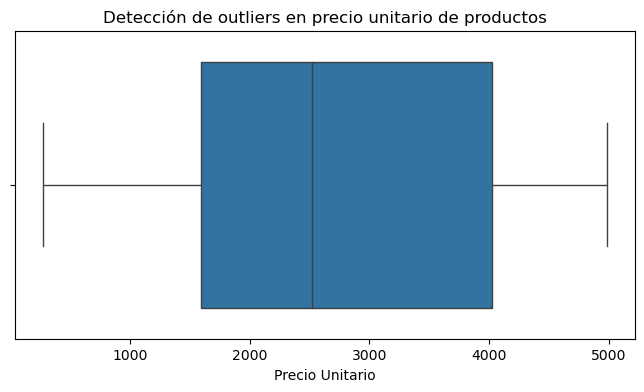


--- Resumen estadístico de la columna precio_unitario ---


count     100.000000
mean     2718.550000
std      1381.635324
min       272.000000
25%      1590.000000
50%      2516.000000
75%      4026.500000
max      4982.000000
Name: precio_unitario, dtype: float64

In [8]:
# Visualización de outliers en precios unitarios
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_productos['precio_unitario'])
plt.title('Detección de outliers en precio unitario de productos')
plt.xlabel('Precio Unitario')
plt.show()

print("\n--- Resumen estadístico de la columna precio_unitario ---")
display(df_productos['precio_unitario'].describe())

**Pregunta 2**: Cual es la distribucion de productos por categoria?

Ejecutamos un script que coloque los productos en su categoria correspondiente

In [9]:
# Verificamos la distribucion de productos por categoria
print("\n--- Distribución de productos por categoría ---")
print(df_productos['categoria'].value_counts())

# Función para recategorizar productos
def recategorizar_producto(nombre_producto):
    nombre_producto_lower = str(nombre_producto).lower()

    # Palabras clave para la categoría 'Limpieza'
    # (Actualizar esta lista con las palabras clave específicas)
    keywords_limpieza = [
        'lavandina', 'detergente', 'limpiador', 'shampoo', 'toallas húmedas',
        'papel higiénico', 'servilletas', 'jabón', 'desodorante', 'cepillo', 'crema dental',
        'hilo dental', 'mascarilla', 'suavizante', 'limpiavidrios', 'desengrasante',
        'trapo', 'desinfectante', 'esponja'
    ]

    for keyword in keywords_limpieza:
        if keyword in nombre_producto_lower:
            return 'Limpieza'

    # Si no se encuentra ninguna palabra clave de limpieza, se asigna a 'Alimentos'
    return 'Alimentos'

# Aplicamos la función directamente a la columna 'categoria'
df_productos['categoria'] = df_productos['nombre_producto'].apply(recategorizar_producto)

# Verificamos la distribución de las categorías corregidas
print("\n--- Distribución de categorías corregidas ---")
print(df_productos['categoria'].value_counts())

# Guardamos el DataFrame modificado (por si queremos utilizarlo en el futuro)
df_productos.to_csv('df_productos_recategorizado.csv', index=False)



--- Distribución de productos por categoría ---
categoria
Alimentos    50
Limpieza     50
Name: count, dtype: int64

--- Distribución de categorías corregidas ---
categoria
Alimentos    83
Limpieza     17
Name: count, dtype: int64


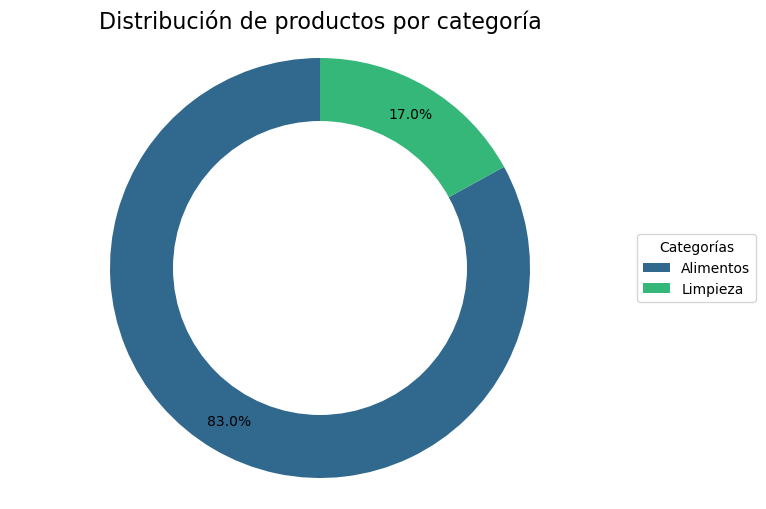

In [10]:
# Visualización: Distribución de productos por categoría en un gráfico de dona

# 1. Preparar los datos: contar los productos por categoría
counts = df_productos['categoria'].value_counts()
labels = counts.index
sizes = counts.values

# 2. Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el gráfico de pastel exterior
wedges, texts, autotexts = ax.pie(sizes,
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 pctdistance=0.85,
                                 colors=sns.color_palette('viridis', len(labels)))

# 3. Dibujar un círculo blanco en el centro para crear el efecto de dona
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# 4. Ajustes finales y títulos
ax.axis('equal')  # Asegura que el gráfico sea un círculo.
plt.title('Distribución de productos por categoría', fontsize=16)
ax.legend(wedges, labels,
          title="Categorías",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

#### Observaciones de productos:

En esta seccion inicialmente comprobamos que no existieran valores atipicos que pudieran entorpecer el analisis. Luego mediante un grafico circular pudimos detectar que habia una inconsistencia en cuanto a la distribucion entre categorias de productos. Habia productos ubicados en las categorias equivocadas, por lo que procedimos a hacer un ordenamiento de los mismos a traves de un script. Logramos obtener la respuesta a la segunda pregunta de nuestro analisis.

#### 2.3. Análisis de ventas

In [11]:
# 2.3. Análisis de ventas (df_ventas)
print("--- Información de ventas ---")
df_ventas.info()

print("\n--- Primeras 5 filas de ventas ---")
display(df_ventas.head())

print("\n--- Resumen estadístico de ventas ---")
display(df_ventas.describe(include='all'))

print("\n--- Conteo de valores nulos en ventas ---")
print(df_ventas.isnull().sum())

--- Información de ventas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_venta        120 non-null    int64         
 1   fecha           120 non-null    datetime64[ns]
 2   id_cliente      120 non-null    int64         
 3   nombre_cliente  120 non-null    object        
 4   email           120 non-null    object        
 5   medio_pago      120 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 5.8+ KB

--- Primeras 5 filas de ventas ---


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta
3,4,2024-02-27,36,Martina Molina,martina.molina@mail.com,transferencia
4,5,2024-06-11,56,Bruno Diaz,bruno.diaz@mail.com,tarjeta



--- Resumen estadístico de ventas ---


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago
count,120.000000,120,120.000000,120,120,120
unique,NaN,NaN,NaN,64,67,4
top,NaN,NaN,NaN,Bruno Diaz,bruno.diaz@mail.com,efectivo
freq,NaN,NaN,NaN,5,5,37
mean,60.500000,2024-03-29 17:36:00,47.291667,NaN,NaN,NaN
min,1.000000,2024-01-02 00:00:00,1.000000,NaN,NaN,NaN
25%,30.750000,2024-02-11 06:00:00,24.500000,NaN,NaN,NaN
50%,60.500000,2024-03-25 00:00:00,48.500000,NaN,NaN,NaN
75%,90.250000,2024-05-19 06:00:00,67.500000,NaN,NaN,NaN
max,120.000000,2024-06-28 00:00:00,100.000000,NaN,NaN,NaN



--- Conteo de valores nulos en ventas ---
id_venta          0
fecha             0
id_cliente        0
nombre_cliente    0
email             0
medio_pago        0
dtype: int64


#### 2.3.1. Visualizacion de ventas

**Pregunta 3**: Cual es el medio de pago mas utilizado?

C:\Users\javie\AppData\Local\Temp\ipykernel_24272\1926415103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='medio_pago', data=df_ventas, order=df_ventas['medio_pago'].value_counts().index, palette='viridis')


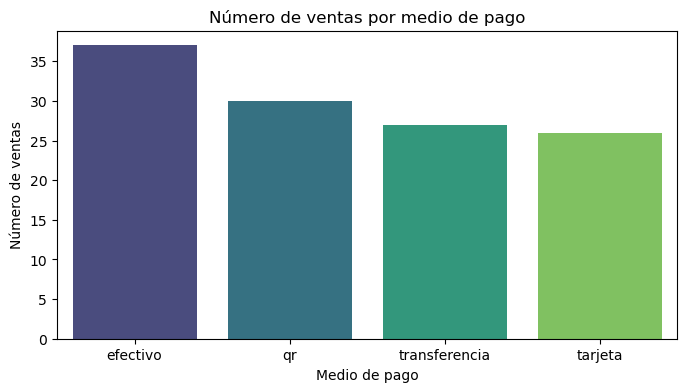

In [12]:
# Visualización: Ventas por medio de pago
plt.figure(figsize=(8, 4))
sns.countplot(x='medio_pago', data=df_ventas, order=df_ventas['medio_pago'].value_counts().index, palette='viridis')
plt.title('Número de ventas por medio de pago')
plt.xlabel('Medio de pago')
plt.ylabel('Número de ventas')
plt.xticks(rotation=0)
plt.show()

#### Observaciones de ventas

Podemos ver que el medio de pago mas utilizado es el efectivo.

#### 2.4. Análisis de detalle de ventas

In [13]:
# 2.4. Análisis de Detalle de Ventas (df_detalle)
print("--- Información de detalle de ventas ---")
df_detalle.info()

print("\n--- Primeras 5 filas de detalle de ventas ---")
display(df_detalle.head())

print("\n--- Resumen Estadístico de detalle de ventas ---")
display(df_detalle.describe())

print("\n--- Conteo de valores nulos en detalle de ventas ---")
print(df_ventas.isnull().sum())

--- Información de detalle de ventas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_venta         343 non-null    int64 
 1   id_producto      343 non-null    int64 
 2   nombre_producto  343 non-null    object
 3   cantidad         343 non-null    int64 
 4   precio_unitario  343 non-null    int64 
 5   importe          343 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 16.2+ KB

--- Primeras 5 filas de detalle de ventas ---


,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,90,Toallas Húmedas x50,1,2902,2902
1,2,82,Aceitunas Negras 200g,5,2394,11970
2,2,39,Helado Vainilla 1L,5,469,2345
3,2,70,Fernet 750ml,2,4061,8122
4,2,22,Medialunas de Manteca,1,2069,2069



--- Resumen Estadístico de detalle de ventas ---


,id_venta,id_producto,cantidad,precio_unitario,importe
count,343.000000,343.000000,343.000000,343.000000,343.000000
mean,61.492711,49.139942,2.962099,2654.495627,7730.078717
std,34.835525,29.135461,1.366375,1308.694720,5265.543077
min,1.000000,1.000000,1.000000,272.000000,272.000000
25%,31.000000,23.000000,2.000000,1618.500000,3489.000000
50%,61.000000,47.000000,3.000000,2512.000000,6702.000000
75%,93.000000,76.000000,4.000000,3876.000000,10231.500000
max,120.000000,100.000000,5.000000,4982.000000,24865.000000



--- Conteo de valores nulos en detalle de ventas ---
id_venta          0
fecha             0
id_cliente        0
nombre_cliente    0
email             0
medio_pago        0
dtype: int64


#### 2.4.1. Visualizacion de detalle de ventas

**Pregunta 4**: ¿Cuáles son los productos más vendidos por cantidad total?

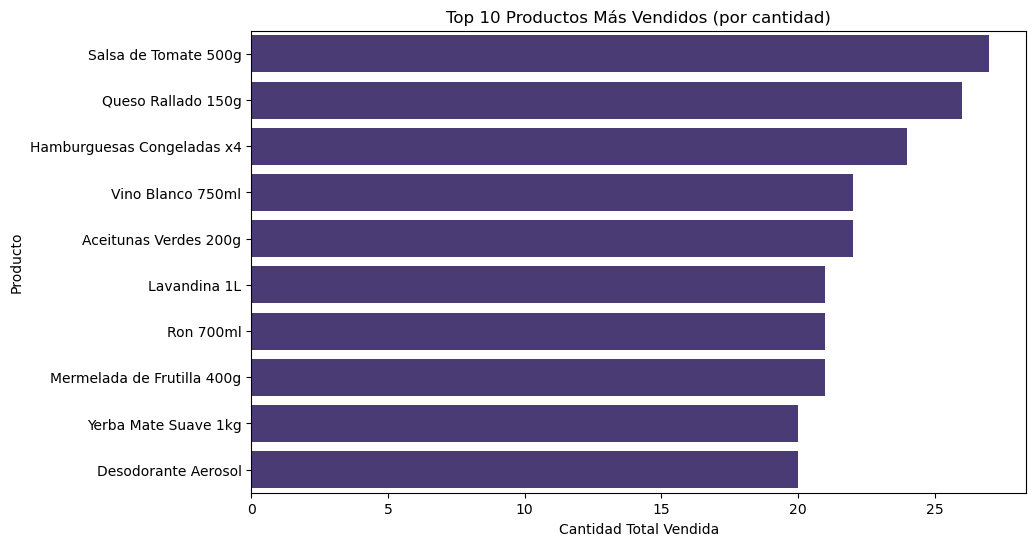

In [14]:
# Visualización: Productos más vendidos por cantidad
# Agrupar por nombre_producto y sumar la cantidad
productos_vendidos_cantidad = df_detalle.groupby('nombre_producto')['cantidad'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=productos_vendidos_cantidad.values, y=productos_vendidos_cantidad.index, color=sns.color_palette('viridis')[0])
plt.title('Top 10 Productos Más Vendidos (por cantidad)')
plt.xlabel('Cantidad Total Vendida')
plt.ylabel('Producto')
plt.show()

#### Observaciones de detalle de ventas

Podemos observar que el producto mas vendido es salsa de tomate de 500g, seguido de queso rallado 150g.

### 3. Creacion de dataframe unificado para análisis

Para un análisis más profundo necesitamos combinar las tablas. Crearemos un dataframe principal (df_completo) que contenga la información de ventas, clientes y productos en un solo lugar.

In [15]:
# Unir df_ventas con df_detalle
df_ventas_detalle = pd.merge(df_ventas, df_detalle, on='id_venta')

# Unir el resultado con df_clientes
# Usamos solo las columnas necesarias de clientes para evitar duplicados (nombre, email)
df_completo = pd.merge(df_ventas_detalle, df_clientes[['id_cliente', 'ciudad', 'fecha_alta']], on='id_cliente')

# Unir el resultado con df_productos para obtener la categoría
# Nota: el nombre del producto y precio ya están en df_detalle, pero la categoría no.
df_completo = pd.merge(df_completo, df_productos[['id_producto', 'categoria']], on='id_producto')

# Convertir la columna 'fecha' a tipo datetime
df_completo['fecha'] = pd.to_datetime(df_completo['fecha'])

print("--- Información del dataframe combinado ---")
df_completo.info()

print("\n--- Primeras filas del dataframe combinado ---")
display(df_completo.head())

--- Información del dataframe combinado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_venta         343 non-null    int64         
 1   fecha            343 non-null    datetime64[ns]
 2   id_cliente       343 non-null    int64         
 3   nombre_cliente   343 non-null    object        
 4   email            343 non-null    object        
 5   medio_pago       343 non-null    object        
 6   id_producto      343 non-null    int64         
 7   nombre_producto  343 non-null    object        
 8   cantidad         343 non-null    int64         
 9   precio_unitario  343 non-null    int64         
 10  importe          343 non-null    int64         
 11  ciudad           343 non-null    object        
 12  fecha_alta       343 non-null    datetime64[ns]
 13  categoria        343 non-null    object        
dty

,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago,id_producto,nombre_producto,cantidad,precio_unitario,importe,ciudad,fecha_alta,categoria
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,90,Toallas Húmedas x50,1,2902,2902,Carlos Paz,2023-03-03,Limpieza
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,82,Aceitunas Negras 200g,5,2394,11970,Rio Cuarto,2023-02-18,Alimentos
2,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,39,Helado Vainilla 1L,5,469,2345,Rio Cuarto,2023-02-18,Alimentos
3,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,70,Fernet 750ml,2,4061,8122,Rio Cuarto,2023-02-18,Alimentos
4,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,22,Medialunas de Manteca,1,2069,2069,Rio Cuarto,2023-02-18,Alimentos


In [16]:
# Convertimos este nuevo dataframe a un archivo .csv
df_completo.to_csv('data/df_completo.csv', index=False)

### 4. Análisis combinado y visualizaciones

Ahora que tenemos un único dataframe, podemos responder preguntas de negocio más interesantes.

**Pregunta 5**: ¿Cuáles son las categorías de productos que más ingresos generan?

C:\Users\javie\AppData\Local\Temp\ipykernel_24272\1740719651.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ingresos_por_categoria.index, y=ingresos_por_categoria.values, palette='plasma')


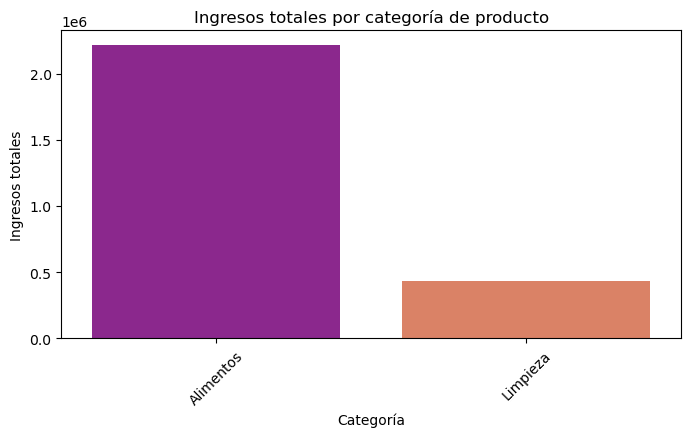

In [17]:
# Pregunta 5: ¿Cuáles son las categorías de productos que más ingresos generan?
ingresos_por_categoria = df_completo.groupby('categoria')['importe'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=ingresos_por_categoria.index, y=ingresos_por_categoria.values, palette='plasma')
plt.title('Ingresos totales por categoría de producto')
plt.xlabel('Categoría')
plt.ylabel('Ingresos totales')
plt.xticks(rotation=45)
plt.show()

**Pregunta 6**: ¿Quiénes son los 10 clientes que más han gastado?

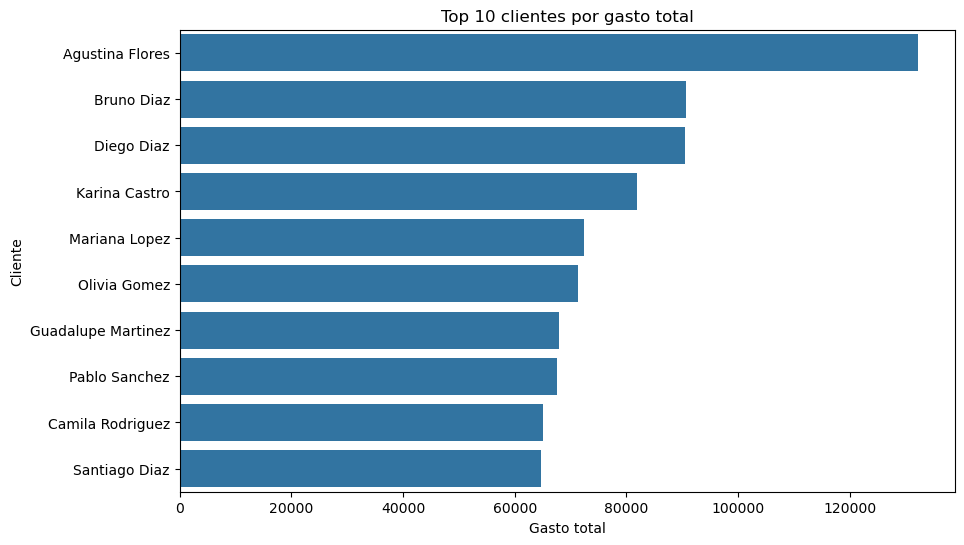

In [18]:
# Pregunta 6: ¿Quiénes son los 10 clientes que más han gastado?
gasto_por_cliente = df_completo.groupby(['id_cliente', 'nombre_cliente'])['importe'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=gasto_por_cliente.index.get_level_values('nombre_cliente'), x=gasto_por_cliente.values, orient='h')
plt.title('Top 10 clientes por gasto total')
plt.xlabel('Gasto total')
plt.ylabel('Cliente')
plt.show()

**Pregunta 7**: ¿Cómo han evolucionado las ventas a lo largo del tiempo?

C:\Users\javie\AppData\Local\Temp\ipykernel_24272\254340858.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_por_mes = df_completo.set_index('fecha').resample('M')['importe'].sum()


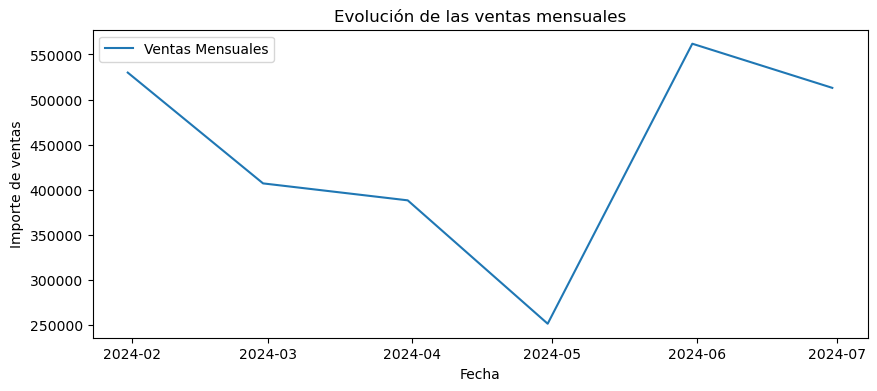

In [19]:
# Pregunta 7: ¿Cómo han evolucionado las ventas a lo largo del tiempo?
# Agrupar por mes y sumar los importes mensuales
ventas_por_mes = df_completo.set_index('fecha').resample('M')['importe'].sum()
# Visualización de la evolución de las ventas
plt.figure(figsize=(10, 4))
plt.plot(ventas_por_mes.index, ventas_por_mes.values, label='Ventas Mensuales')
plt.title('Evolución de las ventas mensuales')
plt.xlabel('Fecha')
plt.ylabel('Importe de ventas')
plt.legend()
plt.show()

Para ver el comportamiento de las ventas a traves del tiempo de una manera mas especifica tomamos la decision de hacer un desglose diario de las mismas y asi poder analizar su comportamiento mas al detalle.

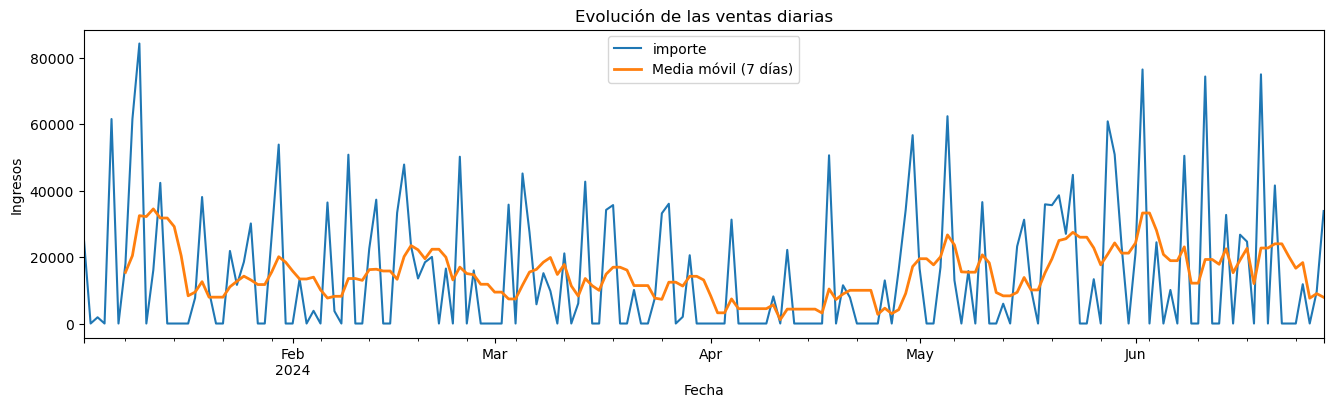

In [20]:
# Agrupar por fecha y sumar los importes diarios
ventas_por_dia = df_completo.set_index('fecha').resample('D')['importe'].sum()
# Calcular la media móvil de 7 días para suavizar la línea
ventas_suavizadas = ventas_por_dia.rolling(window=7).mean()
plt.figure(figsize=(16, 4))
ventas_por_dia.plot()
plt.title('Evolución de las ventas diarias')
ventas_suavizadas.plot(linewidth=2, label='Media móvil (7 días)') # Línea suavizada
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.legend()
plt.show()

##### Observaciones sobre evolucion de las ventas a traves del tiempo

Este grafico de lineas nos permite observar el comportamiento de las ventas a lo largo de los meses. Podemos ver un pico anterior a febrero de 2024. Luego inicia una tendencia bajista hasta mediados de abril de 2025. Desde este punto las ventas retoman una tendencia alcista y alcanzan un pico en junio que luego vuelve a decaer.

**Pregunta 8**: Cuales fueron los productos mas vendidos por categoria?

--- Calculando el producto más vendido por categoría (por cantidad) ---

--- Dataframe combinado (primeras 5 filas) ---


,id_producto,nombre_producto,cantidad,categoria
0,90,Toallas Húmedas x50,1,Limpieza
1,82,Aceitunas Negras 200g,5,Alimentos
2,39,Helado Vainilla 1L,5,Alimentos
3,70,Fernet 750ml,2,Alimentos
4,22,Medialunas de Manteca,1,Alimentos



--- Total de unidades vendidas por producto (primeras 5 filas) ---


,categoria,nombre_producto,cantidad
0,Alimentos,Aceite de Girasol 1L,19
1,Alimentos,Aceitunas Negras 200g,15
2,Alimentos,Aceitunas Verdes 200g,22
3,Alimentos,Agua Mineral 500ml,9
4,Alimentos,Alfajor Simple,7



--- Producto más vendido por categoría ---


,categoria,nombre_producto,cantidad
64,Alimentos,Salsa de Tomate 500g,27
87,Limpieza,Lavandina 1L,21


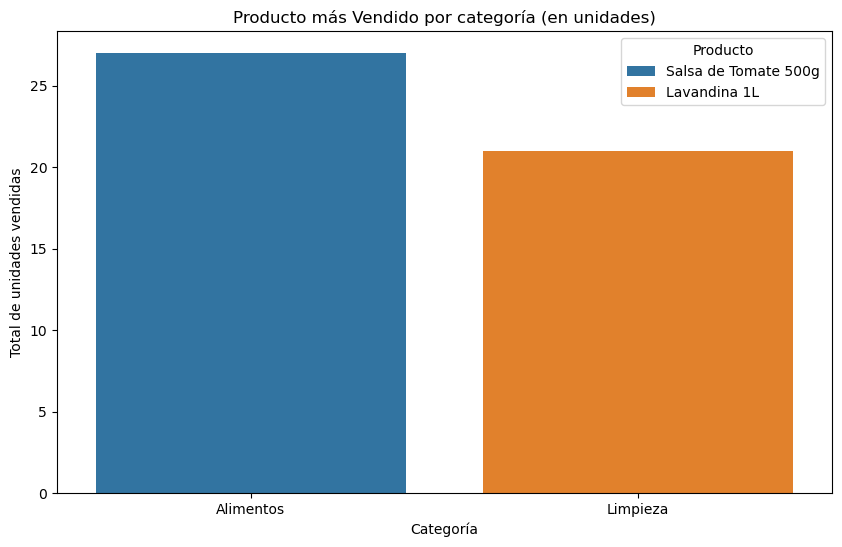

In [21]:
# Pregunta 8: Cuales fueron los productos mas vendidos por categoria?

print("--- Calculando el producto más vendido por categoría (por cantidad) ---")

# 1. Combinamos df_detalle con df_productos para tener la categoría correcta.
# Seleccionamos solo las columnas que necesitamos para el merge.
df_ventas_con_categoria = pd.merge(
    df_detalle[['id_producto', 'nombre_producto', 'cantidad']],
    df_productos[['id_producto', 'categoria']],
    on='id_producto'
)

print("\n--- Dataframe combinado (primeras 5 filas) ---")
display(df_ventas_con_categoria.head())


# 2. Agrupamos por categoría y nombre de producto, y sumamos las cantidades.
total_vendido_por_producto = df_ventas_con_categoria.groupby(
    ['categoria', 'nombre_producto']
)['cantidad'].sum().reset_index()

print("\n--- Total de unidades vendidas por producto (primeras 5 filas) ---")
display(total_vendido_por_producto.head())


# 3. Encontrar el producto con la cantidad máxima para cada categoría.
# Usamos .loc y .idxmax() para obtener el índice del valor máximo en cada grupo.
idx_max_vendidos = total_vendido_por_producto.groupby('categoria')['cantidad'].idxmax()
productos_mas_vendidos = total_vendido_por_producto.loc[idx_max_vendidos]

print("\n--- Producto más vendido por categoría ---")
display(productos_mas_vendidos)


# --- Visualización de los resultados ---
plt.figure(figsize=(10, 6))
sns.barplot(data=productos_mas_vendidos, x='categoria', y='cantidad', hue='nombre_producto', dodge=False)
plt.title('Producto más Vendido por categoría (en unidades)')
plt.xlabel('Categoría')
plt.ylabel('Total de unidades vendidas')
plt.legend(title='Producto')
plt.show()


##### Observaciones sobre productos

Podemos observar que el producto mas vendido en la categoria alimentos fue la salsa de tomate de 500g y en la categoria limpieza la lavandina de 1L

### 5. Feature engineering y matriz de correlacion

Luego del analisis exploratorio sobre las variables dispuestas, generamos nuevos features para intentar encontrar correlaciones que puedan llegar a mostrarnos algo relevante. Tenemos en cuenta la fecha y fecha de alta para generar la antiguedad del cliente en dias, asi como tambien extraemos venta por mes y dia de la semana. Convertimos columnas no numericas como categoria, ciudad y medio_pago a fomato numerico para poder incluirlas aplicando one-hot encoding. Finalmente calculamos una nueva metrica que resume el comportamiento de un cliente, gasto_promedio_cliente, y la añadimos a nuestro conjunto de datos para el analisis.

#### 5.1. Expansión de características para análisis de correlación profundo

In [22]:
# Copiamos el dataframe para no alterar el original
df_corr = df_completo.copy()

# 1. Ingeniería de características a partir de fechas

# Antigüedad del cliente en días al momento de la compra
df_corr['antiguedad_cliente_dias'] = (df_corr['fecha'] - df_corr['fecha_alta']).dt.days

# Componentes numéricos de la fecha de venta
df_corr['venta_mes'] = df_corr['fecha'].dt.month
df_corr['venta_dia_semana'] = df_corr['fecha'].dt.dayofweek # Lunes=0, Domingo=6

##### 5.1.2. Transformación de variables categóricas (one-hot encoding)

In [23]:
# Usaremos pd.get_dummies para convertir 'categoria', 'ciudad' y 'medio_pago'
df_corr = pd.get_dummies(df_corr, columns=['categoria', 'ciudad', 'medio_pago'], prefix=['cat', 'ciudad', 'pago'])

# Creación de variables agregadas por cliente

# Calculamos el gasto promedio por cliente
gasto_promedio_cliente = df_completo.groupby('id_cliente')['importe'].mean().rename('gasto_promedio_cliente')

# Unimos esta nueva característica al dataframe de correlación
df_corr = df_corr.merge(gasto_promedio_cliente, on='id_cliente')

#### 5.2. Generación de la matriz de correlación

--- Matriz de correlación (primeras filas/columnas para visualización) ---


,cantidad,precio_unitario,importe,antiguedad_cliente_dias,venta_mes,venta_dia_semana,gasto_promedio_cliente
cantidad,1.000000,-0.074483,0.599723,0.007750,0.015431,-0.020563,0.326792
precio_unitario,-0.074483,1.000000,0.679298,0.079356,0.056883,-0.023480,0.298189
importe,0.599723,0.679298,1.000000,0.079085,0.072226,-0.026891,0.492654
antiguedad_cliente_dias,0.007750,0.079356,0.079085,1.000000,0.855597,-0.048725,0.124906
venta_mes,0.015431,0.056883,0.072226,0.855597,1.000000,0.057301,0.090429
venta_dia_semana,-0.020563,-0.023480,-0.026891,-0.048725,0.057301,1.000000,-0.090317
gasto_promedio_cliente,0.326792,0.298189,0.492654,0.124906,0.090429,-0.090317,1.000000


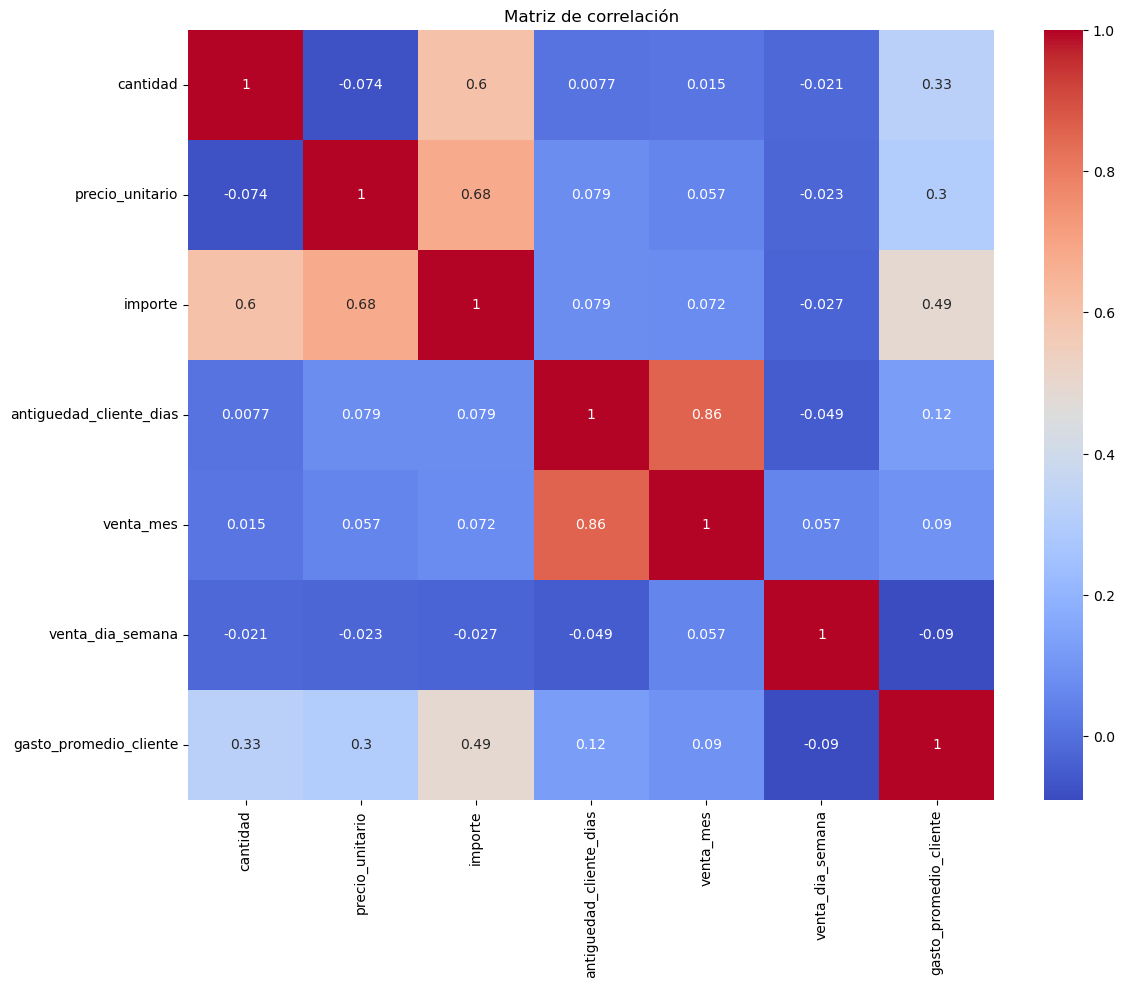

In [24]:
# Seleccionamos solo las columnas numéricas para la matriz
# Excluimos los IDs que no aportan valor a la correlación
columnas_numericas = df_corr.select_dtypes(include=np.number).columns.drop(['id_venta', 'id_cliente', 'id_producto'])
matriz_correlacion_enriquecida = df_corr[columnas_numericas].corr()

print("--- Matriz de correlación (primeras filas/columnas para visualización) ---")
# Mostramos una porción de la matriz para que sea legible
display(matriz_correlacion_enriquecida.head(10))

# Visualización mapa de calor
plt.figure(figsize=(13, 10))
sns.heatmap(matriz_correlacion_enriquecida, cmap='coolwarm', annot=True) # annot=False para no sobrecargar con números
plt.title('Matriz de correlación')
plt.show()

#### 5.3. Insights a partir de correlaciones

Basándonos en la matriz de correlación, podemos explorar la relación entre la antigüedad del cliente y el importe de la venta para ver si los clientes más antiguos tienden a hacer compras de mayor valor.

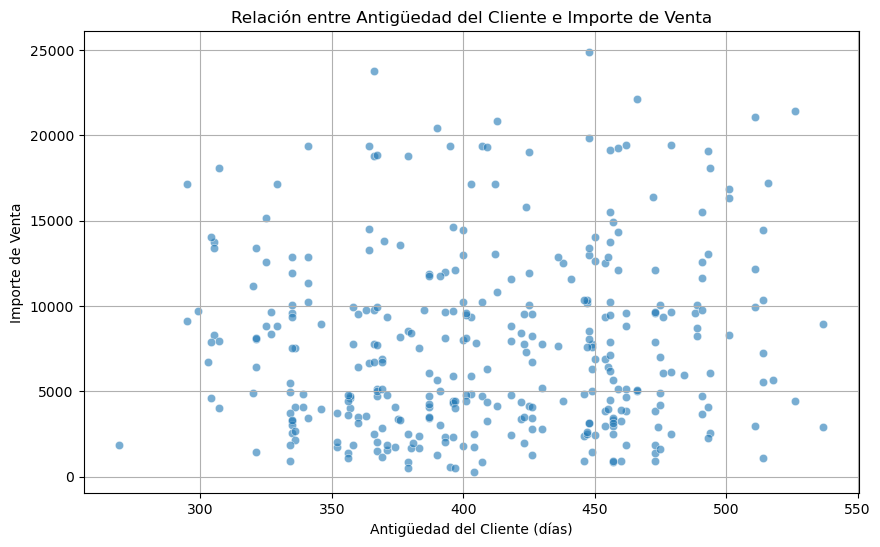

In [25]:
# Visualización: Relación entre antigüedad del cliente e importe de la venta
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_corr, x='antiguedad_cliente_dias', y='importe', alpha=0.6)
plt.title('Relación entre Antigüedad del Cliente e Importe de Venta')
plt.xlabel('Antigüedad del Cliente (días)')
plt.ylabel('Importe de Venta')
plt.grid(True)
plt.show()

No encontramos una relacion clara entre la antiguedad del cliente y el importe de las ventas.

Exploraremos si existen diferencias en el importe de las ventas según la ciudad del cliente.

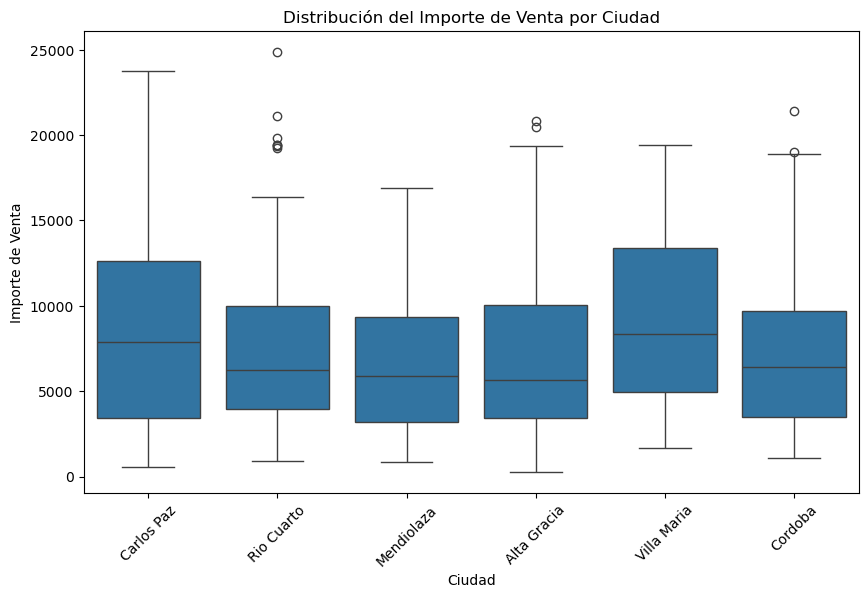

In [26]:
# Visualización: Distribución del importe por ciudad
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_completo, x='ciudad', y='importe')
plt.title('Distribución del Importe de Venta por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Importe de Venta')
plt.xticks(rotation=45) # Rotar etiquetas del eje x si son muchas ciudades
plt.show()

En este caso podemos observar que tenemos tres ubicaciones donde se registraron importes de ventas mas elevados (outliers) dentro del promedio de importes de todas las ciudades: Rio Cuarto, Alta gracia, y Cordoba. Esto nos sugiere que en las ciudades donde hay mas frecuencia de compras tambien los importes son mayores.

Exploraremos si existe una diferencia en el importe de las ventas según el medio de pago utilizado.

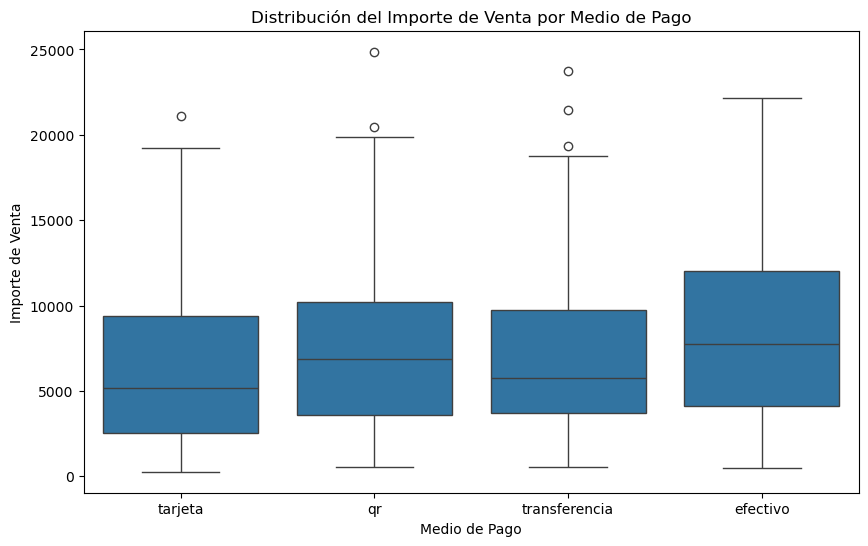

In [27]:
# Visualización: Distribución del importe por medio de pago
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_completo, x='medio_pago', y='importe')
plt.title('Distribución del Importe de Venta por Medio de Pago')
plt.xlabel('Medio de Pago')
plt.ylabel('Importe de Venta')
plt.show()

En este caso podemos ver que tenemos outliers en los importes en funcion del medio de pago, lo que nos sugiere (teniendo en cuenta la visualizacion anterior) que en las ciudades donde los importes de ventas son mas altos, los mismos se registran en tarjeta, qr y transferencia.

### 6. Segmentación de Clientes

#### 6.1. Importacion de librerias y carga de datos

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os

# Configuración de visualización
sns.set(style="whitegrid")

# Cargar datos
df_completo = pd.read_csv('data/df_completo.csv')
df_completo['fecha'] = pd.to_datetime(df_completo['fecha'])
print("Datos cargados correctamente.")

Datos cargados correctamente.


#### 6.2. Calculo de RFM

In [29]:
print("Calculando métricas RFM...")
# Fecha de referencia = día siguiente a la última venta registrada
snapshot_date = df_completo['fecha'].max() + pd.Timedelta(days=1)

# Agrupamos por cliente
rfm = df_completo.groupby('id_cliente').agg({
    'fecha': lambda x: (snapshot_date - x.max()).days, # Recency (Recencia)
    'id_venta': 'nunique',                             # Frequency (Frecuencia)
    'importe': 'sum'                                   # Monetary (Valor monetario)
}).reset_index()

rfm.rename(columns={
    'fecha': 'Recency',
    'id_venta': 'Frequency',
    'importe': 'Monetary'
}, inplace=True)

print(rfm.head())

Calculando métricas RFM...
   id_cliente  Recency  Frequency  Monetary
0           1       95          2     72448
1           2       78          1     22150
2           3      134          1     33310
3           5        4          4    132158
4           6      137          2     48878


#### 6.3. Preprocesamiento de datos

In [30]:
print("Preprocesando datos para Clustering...")
# Log transformation para reducir el sesgo (skewness)
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log1p)

# Estandarización
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

# --- 3. K-Means Clustering ---
print("Ejecutando K-Means...")
# Usaremos K=3 para simplificar la interpretación inicial (ej. VIP, Regulares, En Riesgo)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(rfm_scaled)

rfm['Cluster'] = kmeans.labels_

# Análisis de los clusters
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'id_cliente': 'count'
}).reset_index()

print("\n--- Resumen de Clusters ---")
print(cluster_summary)

Preprocesando datos para Clustering...
Ejecutando K-Means...


c:\Users\javie\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\javie\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\javie\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\javie\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^


--- Resumen de Clusters ---
   Cluster     Recency  Frequency      Monetary  id_cliente
0        0   52.846154   2.615385  60828.730769          26
1        1   10.888889   1.555556  27776.666667           9
2        2  113.000000   1.187500  25621.250000          32


c:\Users\javie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### 6.4. Visualizacion de resultados

Generando visualizaciones...
Gráfico de perfiles guardado en reports/customer_segments_profile.png
Gráfico de dispersión guardado en reports/customer_segments_scatter.png
Datos de segmentación guardados en data/clientes_rfm_clusters.csv


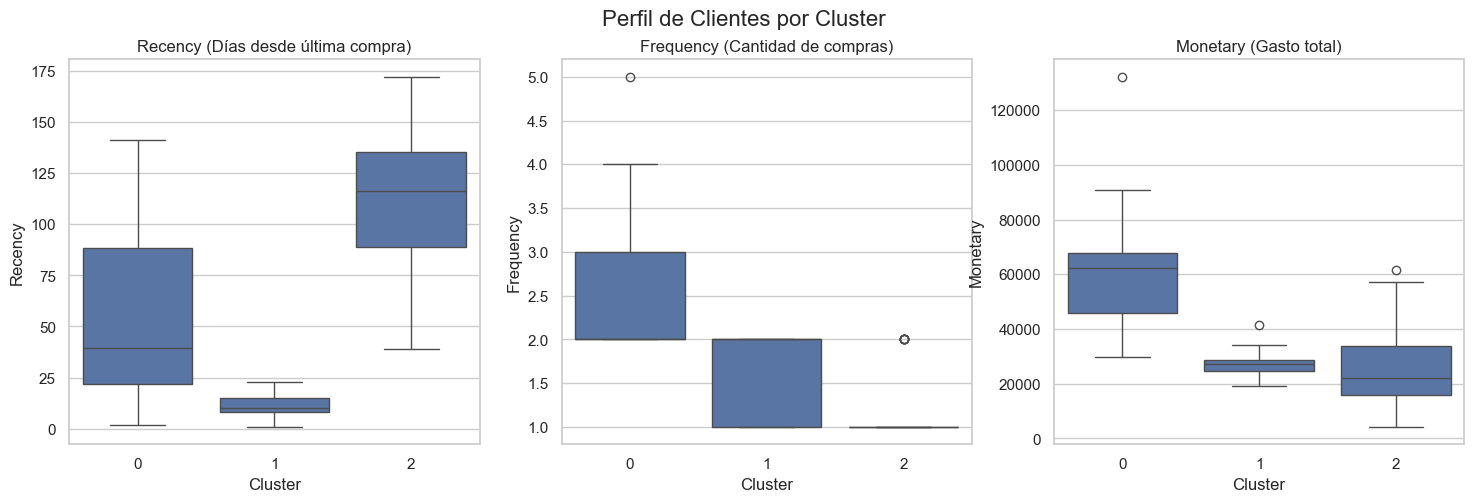

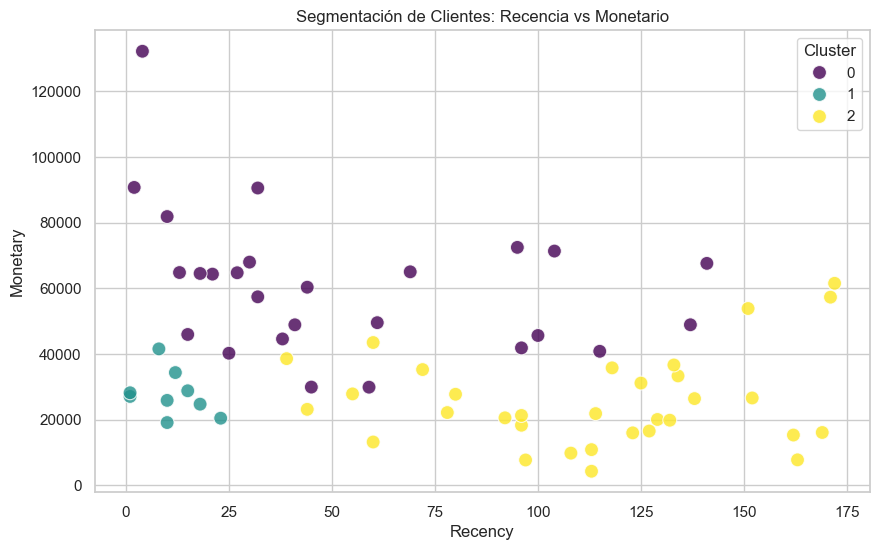

In [31]:
print("Generando visualizaciones...")
if not os.path.exists('../reports'):
    os.makedirs('../reports')

# Boxplots para interpretar clusters
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='Cluster', y='Recency', data=rfm, ax=axes[0])
axes[0].set_title('Recency (Días desde última compra)')

sns.boxplot(x='Cluster', y='Frequency', data=rfm, ax=axes[1])
axes[1].set_title('Frequency (Cantidad de compras)')

sns.boxplot(x='Cluster', y='Monetary', data=rfm, ax=axes[2])
axes[2].set_title('Monetary (Gasto total)')

plt.suptitle('Perfil de Clientes por Cluster', fontsize=16)
plt.savefig('reports/customer_segments_profile.png')
print("Gráfico de perfiles guardado en reports/customer_segments_profile.png")

# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title('Segmentación de Clientes: Recencia vs Monetario')
plt.savefig('reports/customer_segments_scatter.png')
print("Gráfico de dispersión guardado en reports/customer_segments_scatter.png")

# Guardar resultados
rfm.to_csv('data/clientes_rfm_clusters.csv', index=False)
print("Datos de segmentación guardados en data/clientes_rfm_clusters.csv")

### 7. Perfilado de clientes y análisis de negocio final
A continuación, profundizaremos el análisis asignando nombres a los segmentos y cruzando la información con variables de negocio clave como Ciudad y Medio de Pago.

#### 7.1. Perfilado de Clientes (Cluster Labeling)

In [38]:
# 1. Perfilado de Personas (Cluster Labeling)
# Basado en el análisis previo (Cluster 0: Regulares, Cluster 1: Nuevos/Bajo Valor, Cluster 2: En Riesgo)
# NOTA: Estos labels dependen de la ejecución actual de K-Means. Se asume el orden observado previamente.

def label_cluster(cluster):
    if cluster == 0: return "Leales"
    elif cluster == 1: return "Nuevos"
    elif cluster == 2: return "En riesgo"
    return "Otro"

rfm['Segmento'] = rfm['Cluster'].apply(label_cluster)
print(rfm[['id_cliente', 'Cluster', 'Segmento']].head())

   id_cliente  Cluster   Segmento
0           1        0     Leales
1           2        2  En riesgo
2           3        2  En riesgo
3           5        0     Leales
4           6        0     Leales


#### 7.2. Análisis de Contribución (Revenue Contribution)

C:\Users\javie\AppData\Local\Temp\ipykernel_24272\342080474.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_revenue, x='Segmento', y='Monetary', palette='viridis')


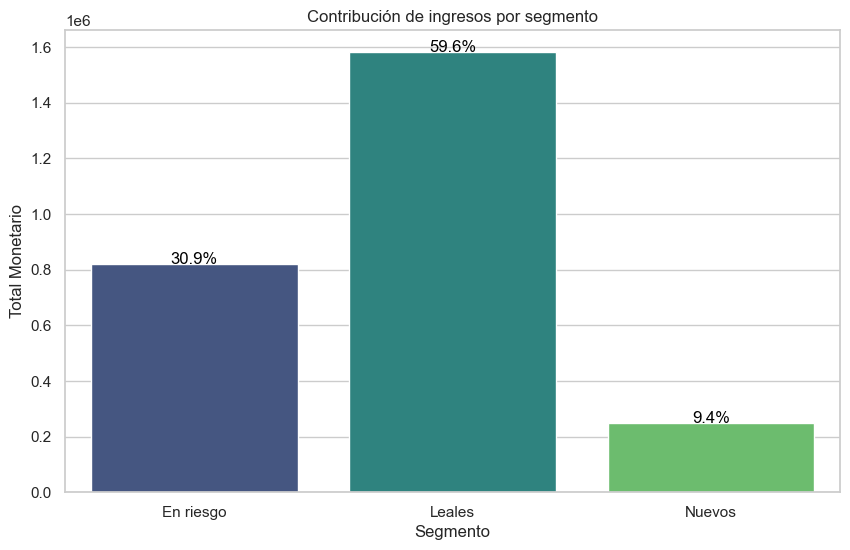

Gráfico de contribución de ingresos por segmento guardado en reports/revenue_contribution.png


In [ ]:
# 2. Análisis de Contribución (Revenue Contribution)
segment_revenue = rfm.groupby('Segmento')['Monetary'].sum().reset_index()
segment_revenue['Share'] = segment_revenue['Monetary'] / segment_revenue['Monetary'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(data=segment_revenue, x='Segmento', y='Monetary', palette='viridis')
plt.title('Contribución de ingresos por segmento')
plt.ylabel('Total Monetario')
for index, row in segment_revenue.iterrows():
    plt.text(index, row.Monetary, f'{row.Share:.1%}', color='black', ha="center")

# Guardar la figura antes de plt.show()
plt.savefig('reports/revenue_contribution.png')

plt.show()
print("Gráfico de contribución de ingresos por segmento guardado en reports/revenue_contribution.png")


#### 7.3. Cruce con Variables de Negocio (Ciudad y Medio de Pago)

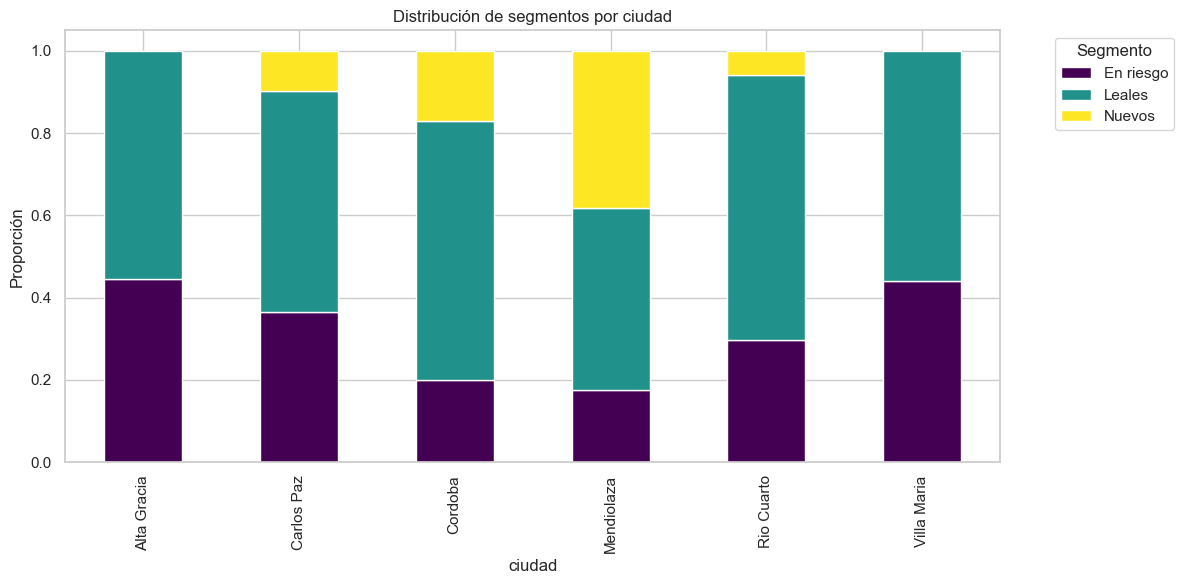

In [45]:
# 3. Cruce con Variables de Negocio (Ciudad y Medio de Pago)
# Unimos el segmento al dataframe original
df_merged = df_completo.merge(rfm[['id_cliente', 'Segmento']], on='id_cliente', how='left')

# Análisis por Ciudad
city_segment = pd.crosstab(df_merged['ciudad'], df_merged['Segmento'], normalize='index')

city_segment.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribución de segmentos por ciudad')
plt.ylabel('Proporción')
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('reports/city_segment.png')
plt.show()

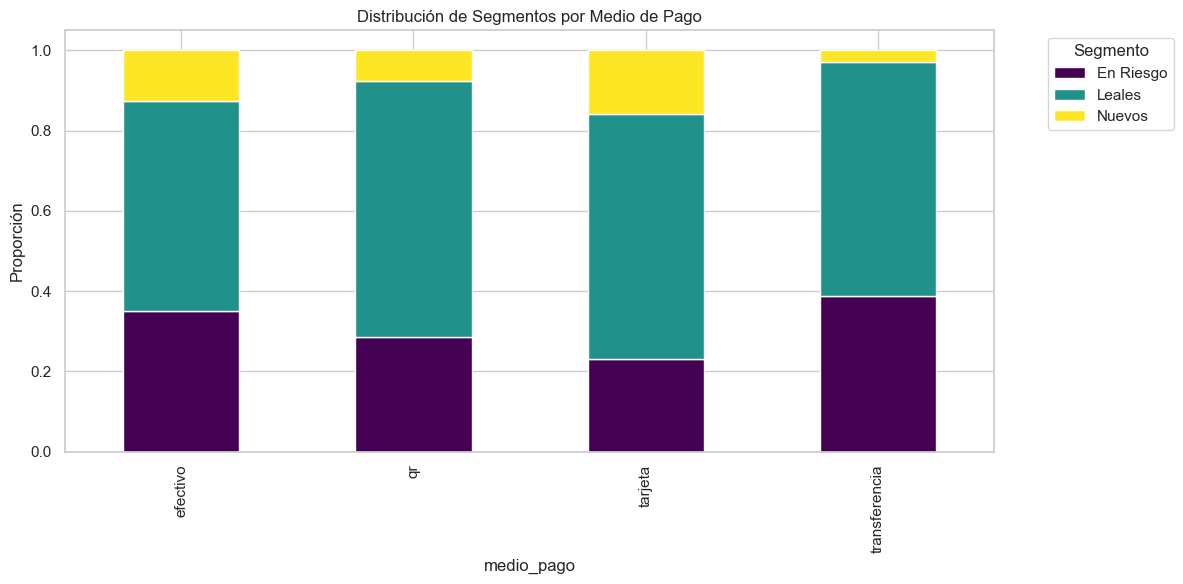

In [35]:
# Análisis por Medio de Pago
payment_segment = pd.crosstab(df_merged['medio_pago'], df_merged['Segmento'], normalize='index')

payment_segment.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Distribución de Segmentos por Medio de Pago')
plt.ylabel('Proporción')
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()